In [ ]:
!pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Deep learning/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df['Age'].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler   #This ensures that both the training and test data are scaled in the same way to maintain consistency.
scaler = StandardScaler()

In [ ]:
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
X.shape

(10000, 11)

Now lets make our neural network architecture

In [ ]:
model = Sequential()

model.add(Dense(3,activation='sigmoid',input_dim=11))  #input layer has 11 inputs and 3 hidden layers(we can alter the number of hidden layers to play with accuracy)
model.add(Dense(1,activation='sigmoid'))         #output layer

In [ ]:
model.summary()           # 36 = 11*3+3

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


now we train the model

In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)       #we strore it in history to use it in future for plotting comparison graphs
# validation split further divides the x_train into more test sets and evaluates

Epoch 1/100
128/128 [==============================] - 2s 4ms/step - loss: 0.6081 - accuracy: 0.7408 - val_loss: 0.5761 - val_accuracy: 0.7519
Epoch 2/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5663 - accuracy: 0.7431 - val_loss: 0.5461 - val_accuracy: 0.7519
Epoch 3/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5424 - accuracy: 0.7431 - val_loss: 0.5284 - val_accuracy: 0.7519
Epoch 4/100
128/128 [==============================] - 0s 4ms/step - loss: 0.5282 - accuracy: 0.7431 - val_loss: 0.5181 - val_accuracy: 0.7519
Epoch 5/100
128/128 [==============================] - 1s 4ms/step - loss: 0.5195 - accuracy: 0.7431 - val_loss: 0.5118 - val_accuracy: 0.7519
Epoch 6/100
128/128 [==============================] - 1s 4ms/step - loss: 0.5139 - accuracy: 0.7480 - val_loss: 0.5077 - val_accuracy: 0.7975
Epoch 7/100
128/128 [==============================] - 1s 4ms/step - loss: 0.5101 - accuracy: 0.7972 - val_loss: 0.5049 - val_accuracy: 0.7975

In [ ]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 3ms/step


In [ ]:
y_pred

array([[0.13888907],
       [0.20322892],
       [0.13888907],
       ...,
       [0.13888907],
       [0.24614568],
       [0.20322892]], dtype=float32)

In [ ]:
y_pred = y_pred.argmax(axis=-1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7925

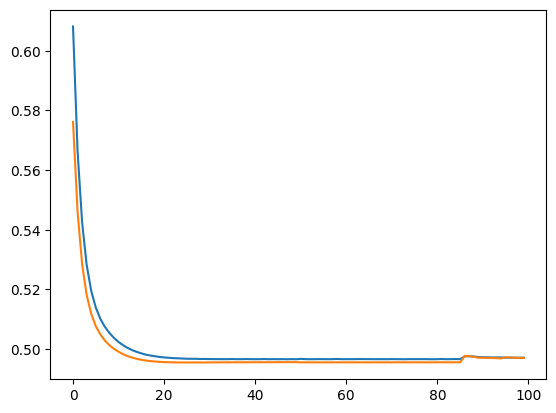

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

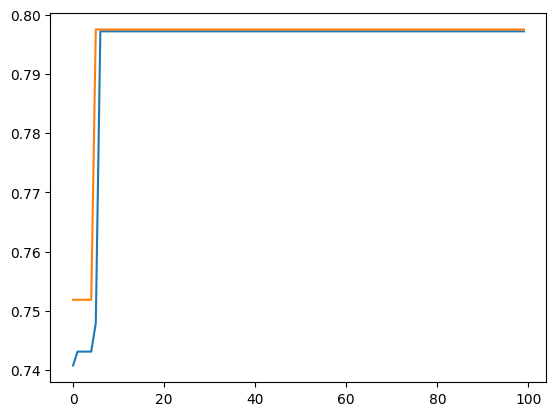

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])